In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

In [ ]:
!mv kaggle.json /root/.kaggle/kaggle.json

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

In [ ]:
!unzip udea*.zip > /dev/null

replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [ ]:
!ls -lash *.csv

4.5M -rw-r--r-- 1 root root 4.5M Mar 25 16:54 submission_example.csv
 57M -rw-r--r-- 1 root root  57M Mar 25 16:54 test.csv
138M -rw-r--r-- 1 root root 138M Mar 25 16:54 train.csv


In [ ]:
#Lectura de los datos
bd_train = pd.read_csv("train.csv")

#Exploración
bd_train

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328


In [ ]:
#tamaño de los datos
print(f"Número de filas y columnas: {bd_train.shape}")


Número de filas y columnas: (692500, 21)


In [ ]:
 #Columnas
print(f"Columnas disponibles: {bd_train.columns.tolist()}")

Columnas disponibles: ['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL', 'coef_1', 'coef_2', 'coef_3', 'coef_4']


In [ ]:
# Mostrar cada columna en una línea
for col in bd_train.columns:
    print(col)

ID
PERIODO
ESTU_PRGM_ACADEMICO
ESTU_PRGM_DEPARTAMENTO
ESTU_VALORMATRICULAUNIVERSIDAD
ESTU_HORASSEMANATRABAJA
FAMI_ESTRATOVIVIENDA
FAMI_TIENEINTERNET
FAMI_EDUCACIONPADRE
FAMI_TIENELAVADORA
FAMI_TIENEAUTOMOVIL
ESTU_PRIVADO_LIBERTAD
ESTU_PAGOMATRICULAPROPIO
FAMI_TIENECOMPUTADOR
FAMI_TIENEINTERNET.1
FAMI_EDUCACIONMADRE
RENDIMIENTO_GLOBAL
coef_1
coef_2
coef_3
coef_4


In [ ]:
# Contar estudiantes por FAMI_EDUCACIONMADRE y mostrar uno por línea
conteo = bd_train['FAMI_EDUCACIONMADRE'].value_counts()

for valor, cantidad in conteo.items():
    print(f"{valor}: {cantidad}")

Secundaria (Bachillerato) completa: 141744
Primaria incompleta: 99420
Técnica o tecnológica completa: 89542
Educación profesional completa: 85326
Secundaria (Bachillerato) incompleta: 81012
Primaria completa: 56125
Postgrado: 46246
Técnica o tecnológica incompleta: 27533
Educación profesional incompleta: 22470
Ninguno: 14483
No sabe: 3017
No Aplica: 1918


In [ ]:
# Contar estudiantes por Programa Académico
conteo_programas = bd_train['ESTU_PRGM_ACADEMICO'].value_counts()

for programa, cantidad in conteo_programas.items():
    print(f"{programa}: {cantidad}")

DERECHO: 53244
ADMINISTRACION DE EMPRESAS: 51902
CONTADURIA PUBLICA: 39664
PSICOLOGIA: 31932
INGENIERIA INDUSTRIAL: 28481
ADMINISTRACIÓN DE EMPRESAS: 24777
INGENIERIA CIVIL: 19487
MEDICINA: 18099
PSICOLOGÍA: 17377
INGENIERIA DE SISTEMAS: 17150
TRABAJO SOCIAL: 12686
ENFERMERIA: 11635
ARQUITECTURA: 11469
ADMINISTRACIÓN EN SALUD OCUPACIONAL: 11018
CONTADURÍA PÚBLICA: 10912
INGENIERIA AMBIENTAL: 9999
NEGOCIOS INTERNACIONALES: 8858
LICENCIATURA EN PEDAGOGIA INFANTIL: 8468
ECONOMIA: 7023
INGENIERIA MECANICA: 6928
INGENIERIA ELECTRONICA: 6407
INGENIERÍA INDUSTRIAL: 6313
LICENCIATURA EN PEDAGOGÍA INFANTIL: 6305
FISIOTERAPIA: 5992
COMUNICACION SOCIAL: 5320
ODONTOLOGIA: 5120
ADMINISTRACION PUBLICA TERRITORIAL: 5002
ADMINISTRACION DE NEGOCIOS INTERNACIONALES: 4429
INGENIERIA QUIMICA: 3961
COMUNICACION SOCIAL- PERIODISMO: 3512
ADMINISTRACIÓN FINANCIERA: 3366
INGENIERÍA AMBIENTAL: 2991
ADMINISTRACION FINANCIERA: 2972
MEDICINA VETERINARIA Y ZOOTECNIA: 2865
DISEÑO GRAFICO: 2818
BIOLOGIA: 2770
INGENIE

In [ ]:
# Mostrar cantidad de valores nulos por columna
null_counts = bd_train.isnull().sum()

for columna, cantidad in null_counts.items():
    print(f"{columna}: {cantidad} valores nulos")


ID: 0 valores nulos
PERIODO: 0 valores nulos
ESTU_PRGM_ACADEMICO: 0 valores nulos
ESTU_PRGM_DEPARTAMENTO: 0 valores nulos
ESTU_VALORMATRICULAUNIVERSIDAD: 6287 valores nulos
ESTU_HORASSEMANATRABAJA: 30857 valores nulos
FAMI_ESTRATOVIVIENDA: 32137 valores nulos
FAMI_TIENEINTERNET: 26629 valores nulos
FAMI_EDUCACIONPADRE: 23178 valores nulos
FAMI_TIENELAVADORA: 39773 valores nulos
FAMI_TIENEAUTOMOVIL: 43623 valores nulos
ESTU_PRIVADO_LIBERTAD: 0 valores nulos
ESTU_PAGOMATRICULAPROPIO: 6498 valores nulos
FAMI_TIENECOMPUTADOR: 38103 valores nulos
FAMI_TIENEINTERNET.1: 26629 valores nulos
FAMI_EDUCACIONMADRE: 23664 valores nulos
RENDIMIENTO_GLOBAL: 0 valores nulos
coef_1: 0 valores nulos
coef_2: 0 valores nulos
coef_3: 0 valores nulos
coef_4: 0 valores nulos


In [ ]:
#La función describe del dataframe bd_train nos permite conocer algunos valores estadisticos
#count: Cantidad de valores no nulos
#mean: Media
#std: Desviación estandar
#min/25%/50%/75%/max: Valores mínimo, de percentiles 25, 50 y 75 y máximo.

bd_train.describe()

,ID,PERIODO,coef_1,coef_2,coef_3,coef_4
count,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000
mean,494606.130576,20198.366679,0.268629,0.259996,0.262087,0.262903
std,285585.209455,10.535037,0.122130,0.093480,0.058862,0.067944
min,1.000000,20183.000000,0.000000,0.000000,0.000000,0.000000
25%,247324.750000,20195.000000,0.203000,0.212000,0.254000,0.255000
50%,494564.500000,20195.000000,0.240000,0.271000,0.276000,0.285000
75%,741782.500000,20203.000000,0.314000,0.309000,0.293000,0.303000
max,989286.000000,20213.000000,0.657000,0.487000,0.320000,0.332000


In [ ]:
#Datos duplicados
print(f"Registros duplicados: {bd_train.duplicated().sum()}")

Registros duplicados: 0


In [ ]:
#Promedio de coef_1, coef_2, coef_3, coef_4
print(f"Promedio coef_1: {bd_train['coef_1'].mean():.4f}")
print(f"Promedio coef_2: {bd_train['coef_2'].mean():.4f}")
print(f"Promedio coef_3: {bd_train['coef_3'].mean():.4f}")
print(f"Promedio coef_4: {bd_train['coef_4'].mean():.4f}")


Promedio coef_1: 0.2686
Promedio coef_2: 0.2600
Promedio coef_3: 0.2621
Promedio coef_4: 0.2629


<Axes: xlabel='ESTU_VALORMATRICULAUNIVERSIDAD'>

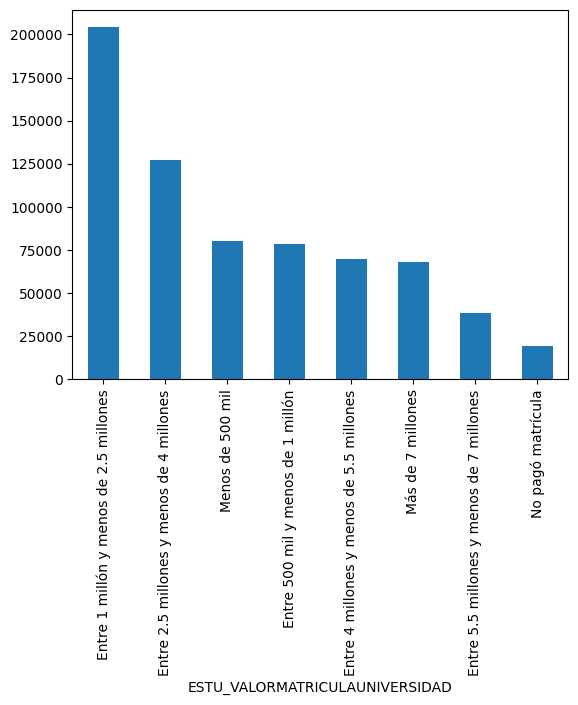

In [ ]:
#Distribución por costó de matricula
bd_train.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()
bd_train.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().plot(kind='bar')

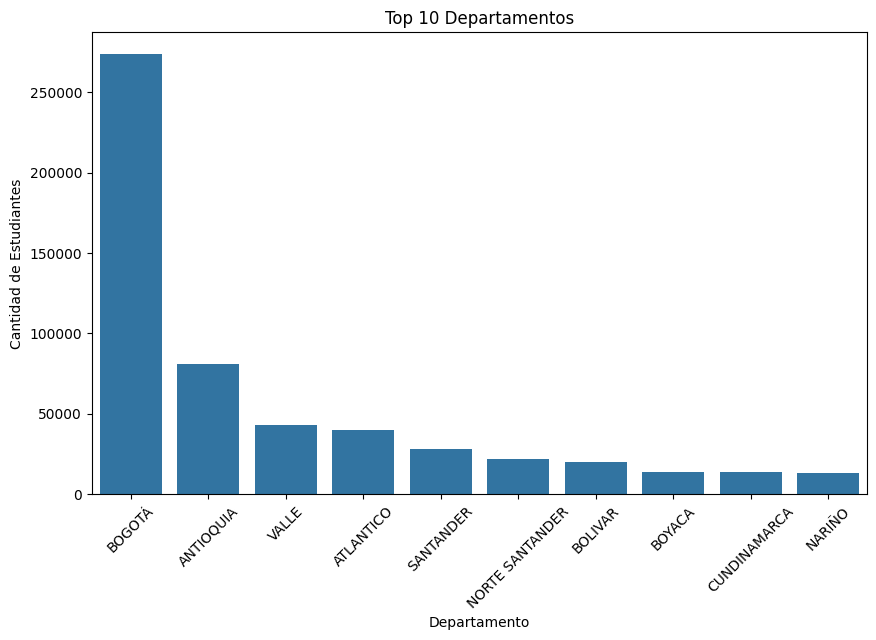

In [ ]:
# Gráfico de barras: estudiantes por departamento
# Contar departamentos
departamentos = df['ESTU_PRGM_DEPARTAMENTO'].value_counts().head(10)

# Graficar
plt.figure(figsize=(10,6))
sns.barplot(x=departamentos.index, y=departamentos.values)  # Cambiado el orden
plt.title('Top 10 Departamentos')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks(rotation=45)  # Para rotar etiquetas si son largas
plt.show()

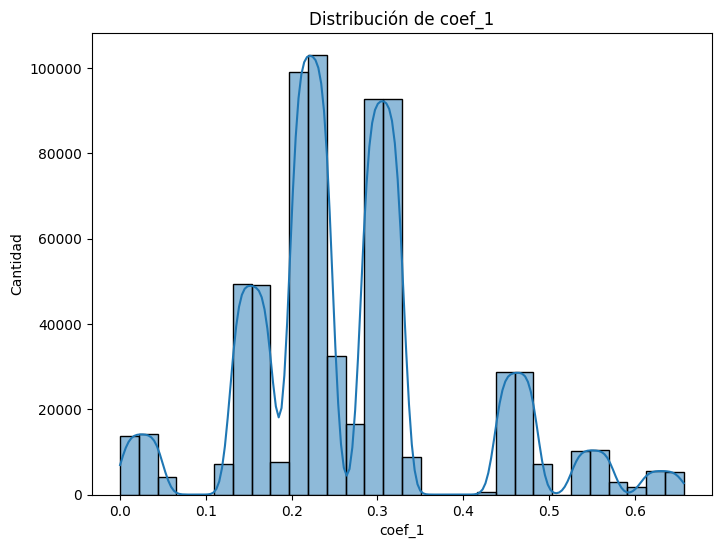

In [ ]:
# Histograma de un coeficiente (por ejemplo coef_1)
# Histograma de coef_1
plt.figure(figsize=(8,6))
sns.histplot(bd_train['coef_1'], bins=30, kde=True)
plt.title('Distribución de coef_1')
plt.xlabel('coef_1')
plt.ylabel('Cantidad')
plt.show()
